<a href="https://colab.research.google.com/github/pchumachenko/pchumachenko/blob/main/Prediction_aff_const_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
print('Загрузите тренировочный датасет')
uploaded = files.upload()

train_file = ''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  train_file=fn

Загрузите тренировочный датасет


Saving train_dataset (1) to train_dataset (1)
User uploaded file "train_dataset (1)" with length 60103 bytes


(50, 1)

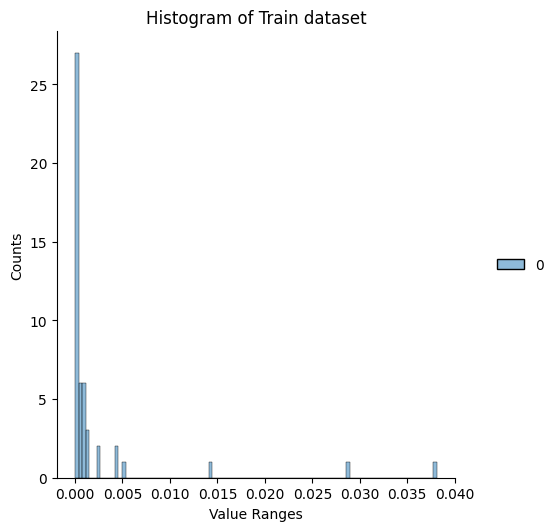

In [ ]:
#строим гистограмму выборки (график плотности)
input = y_val

# seaborn histogram
sns.displot(input, kde=False,
             bins=int(1000/10), color = 'blue')
# Add labels
plt.title('Histogram of Train dataset')
plt.xlabel('Value Ranges')
plt.ylabel('Counts')

adata = np.array(input)
adata.shape

In [ ]:
print('Загрузите валидационный датасет')
uploaded = files.upload()

valid_file = ''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  valid_file=fn

Загрузите валидационный датасет


Saving valid_dataset (1) to valid_dataset (1)
User uploaded file "valid_dataset (1)" with length 20019 bytes


In [ ]:
print('Загрузите проверочный датасет')
uploaded = files.upload()

test_file = ''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  test_file=fn

Загрузите проверочный датасет


Saving test_dataset (1) to test_dataset (1)
User uploaded file "test_dataset (1)" with length 599 bytes


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import torch
from torch import nn

from matplotlib import pyplot as plt
from IPython.display import clear_output
from sklearn import preprocessing

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv1d(in_channels=8, out_channels=6, kernel_size=4, padding=2)
        self.func1 = nn.ELU()

        self.conv2 = nn.Conv1d(in_channels=6, out_channels=3, kernel_size=5)
        self.func2 = nn.ELU()

        self.lin1 = nn.Linear(3 * 12, 20)
        self.func3 = nn.ELU()

        self.lin2 = nn.Linear(20, 1)
        self.func4 = nn.ReLU()

    def forward(self, input):
        out = self.func1(self.conv1(input))
        out = self.func2(self.conv2(out))

        out = torch.flatten(out, 1)

        out = self.func3(self.lin1(out))
        out = self.func4(self.lin2(out))

        return out

In [ ]:
class Net_v2(nn.Module):
    def __init__(self):
        super().__init__()

        self.lin1 = nn.Linear(8 * 15, 8 * 15 * 8)
        self.func1 = nn.ELU()

        self.lin2 = nn.Linear(8 * 15 * 8, 8 * 15 * 8)
        self.func2 = nn.ELU()

        self.lin3 = nn.Linear(8 * 15 * 8, 8 * 15 * 4)
        self.func3 = nn.ELU()

        self.lin4 = nn.Linear(8 * 15 * 4, 8 * 15)
        self.func4 = nn.ELU()

        self.lin5 = nn.Linear(8 * 15, 96)
        self.func5 = nn.ELU()

        self.lin6 = nn.Linear(96, 20)
        self.func6 = nn.ELU()

        self.lin7 = nn.Linear(20, 1)
        self.func7 = nn.ELU()
        #self.func7 = nn.ReLU()

    def forward(self, input):
        out = torch.flatten(input, 1)

        out = self.func1(self.lin1(out))
        out = self.func2(self.lin2(out))
        out = self.func3(self.lin3(out))
        out = self.func4(self.lin4(out))
        out = self.func5(self.lin5(out))
        out = self.func6(self.lin6(out))
        out = self.func7(self.lin7(out))

        return out

In [ ]:
class Net_v3(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv1d(in_channels=8, out_channels=10, kernel_size=3, padding=1) #8x15 --> 10x15
        self.func1 = nn.ELU()

        self.conv2 = nn.Conv1d(in_channels=10, out_channels=8, kernel_size=5, padding=2 ) #10x15 --> 8x15
        self.func2 = nn.ELU()

        self.lin1 = nn.Linear(8 * 15, 20)
        self.func3 = nn.ELU()

        self.lin2 = nn.Linear(20, 1)
        self.func4 = nn.ReLU()

    def forward(self, input):
        out = self.func1(self.conv1(input))
        out = self.func2(self.conv2(out))

        out = torch.flatten(out, 1)

        out = self.func3(self.lin1(out))
        out = self.func4(self.lin2(out))

        return out

In [ ]:
class Net_v4_dense(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, padding=1) #8x15 --> 10x15
        self.func1 = nn.ELU()

        self.conv2 = nn.Conv1d(in_channels=8, out_channels=8, kernel_size=5, padding=2 ) #10x15 --> 8x15
        self.func2 = nn.ELU()

        self.lin3 = nn.Linear((8 * 15)+(8 * 15), 1000)
        self.func3 = nn.ELU()

        self.lin4 = nn.Linear(1000, 300)
        self.func4 = nn.ELU()

        self.lin5 = nn.Linear(300, 20)
        self.func5 = nn.ELU()

        self.lin6 = nn.Linear(20, 1)
        #self.func6 = nn.ReLU()
        self.func6 = nn.ELU()

    def forward(self, input):
        out = self.func1(self.conv1(input))
        out = self.func2(self.conv2(out))

        out = torch.cat((torch.flatten(out, 1), torch.flatten(input, 1)), 1)

        out = self.func3(self.lin3(out))
        out = self.func4(self.lin4(out))
        out = self.func5(self.lin5(out))
        out = self.func6(self.lin6(out))

        return out

In [ ]:
def iterate_minibatches(x_data, y_data, batch_size, shuffle):
    while True:
      indices = np.arange(x_data.shape[0])
      if shuffle:
          indices = np.random.permutation(indices)

      for start in range(0, len(indices), batch_size):
          batch = x_data[indices[start : start + batch_size]]
          target = y_data[indices[start : start + batch_size]]
          yield batch, target

      break

In [ ]:
#dataset loader and coder functions
#буква в вектор методом one-hot
def nucleotid_to_vector(letter):
  return {
          letter == 'A': (1,0,0,0),
          letter == 'T': (0,1,0,0),
          letter == 'C': (0,0,1,0),
          letter == 'G': (0,0,0,1),
  }[True]

#олиг в вектор методом one-hot (получаем вектор [длина олига]*4)
def olig_to_matrix(olig):
  matrix = []
  for letter in olig:
      matrix.append(nucleotid_to_vector(letter))

  #matrix = matrix[:-1]
  return matrix

#соединяем олиги и кодируем в матрицу (8*15)
def oligs_combine_to_matrix(olig1, olig2):
  if len(olig1) != len(olig2):
    print("Олиги разной длины не подходят")
    return

  matrix = []
  for i in range(len(olig1)):
    matrix.append(nucleotid_to_vector(olig1[i])+nucleotid_to_vector(olig2[i]))

  return matrix

#импорт датасета из файла
def import_dataset(dataset_file):
  #импортируем датасет в виде текста
  print('Импорт данных из файла:' + dataset_file)
  dataset = pd.read_csv(dataset_file, header=None)
  data = np.array(dataset)

  #форматируем датасет под размер входных данных: input shape must be (n_samples, 8, 15)
  oligs = []
  y = []

  for i in data:
    oligs.append(i[:-1])
    y.append(i[2])
  oligs = np.asarray(oligs)

  x = []
  for olig_pair in oligs:
    oligs_coded = np.array(oligs_combine_to_matrix(olig_pair[0], olig_pair[1]))
    oligs_coded = np.transpose(oligs_coded)
    x.append(oligs_coded)

  return x, y

#вытаскиваем из датасета валидационную выборку
def get_val_from_trainset(x, y, percentage):
  if len(x) != len(y):
    print("Входные массивы разной длины не подходят")
    return
  each = len(x) // (len(x) * percentage / 100) #берем заданный процент от датасета в качестве валидационной выборки

  vx = []
  vy = []
  tx = []
  ty = []
  counter = 0
  for i in range(len(x)):
    counter = counter +1
    if counter == each:
      vx.append(x[i])
      vy.append(y[i])
      counter = 0
    else:
      tx.append(x[i])
      ty.append(y[i])

  return tx, ty, vx, vy

In [ ]:
def train_model(model, opt, loss_func, X_train, y_train, X_val, y_val, n_epochs=500, batch_size=100, batch_shuffle=False):
  train_loss_history = []
  val_loss_history = []

  #X_val = torch.tensor(X_val, dtype=torch.float)
  #y_val = torch.tensor(y_val, dtype=torch.float)

  for epoch in range(n_epochs):

    local_train_loss_history = []

    for idx, (batch, target) in enumerate(iterate_minibatches(X_train, y_train, batch_size, batch_shuffle)):
      # print(batch)
      batch = torch.tensor(batch, dtype=torch.float)
      target = torch.tensor(target, dtype=torch.float)

      y_pred = model(batch)

      loss = loss_func(y_pred, target)

      loss.backward()
      opt.step()
      opt.zero_grad()

      local_train_loss_history.append(loss.item())


    train_loss_history.append(np.mean(local_train_loss_history))

    val_pred = model(X_val)
    cur_val = loss_func(val_pred, y_val).to('cpu').detach().item()
    val_loss_history.append(cur_val)

    clear_output(wait=True)
    plt.title('Loss')
    plt.plot(train_loss_history, label='train')
    plt.plot(val_loss_history, label='validation')
    plt.legend()
    plt.figure(figsize=(8, 8))
    plt.show()

    print("loss: ", loss.item(), "   val_loss: ", cur_val)

  return model

In [ ]:
#готовим обучающий сет
x, y = import_dataset(train_file)
#xt = x
#yt = y
y = np.array(y)
y = preprocessing.normalize(y.reshape(-1, 1), axis = 0)
xt, yt, vx, vy = get_val_from_trainset(x, y, 5)

X_train = torch.tensor(xt, dtype=torch.float)
y_scale = 1 #1e12
y_train = torch.tensor(yt, dtype=torch.float) * y_scale

X_train.shape, y_train.shape

Импорт данных из файла:train_dataset (1)


(torch.Size([950, 8, 15]), torch.Size([950, 1]))

In [ ]:
#готовим валидационный сет
#x, y = import_dataset(valid_file)
x, y = vx, vy

X_val = torch.tensor(x, dtype=torch.float)
y_val = torch.tensor(y, dtype=torch.float) * y_scale

X_val.shape, y_val.shape

(torch.Size([50, 8, 15]), torch.Size([50, 1]))

In [ ]:
#готовим тестовый сет
x, y = import_dataset(test_file)
y = np.array(y)
y = preprocessing.normalize(y.reshape(-1, 1), axis = 0)


X_test = torch.tensor(x, dtype=torch.float)
y_test = torch.tensor(y, dtype=torch.float) * y_scale

X_test.shape, y_test.shape

Импорт данных из файла:test_dataset (1)


(torch.Size([10, 8, 15]), torch.Size([10, 1]))

In [ ]:
model = Net_v4_dense() #input shape must be (n_samples, 8, 15)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = torch.optim.Adam(model.parameters())

loss_func = nn.MSELoss()
#loss_func = nn.L1Loss | nn.MSELoss | nn.NLLLoss

X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

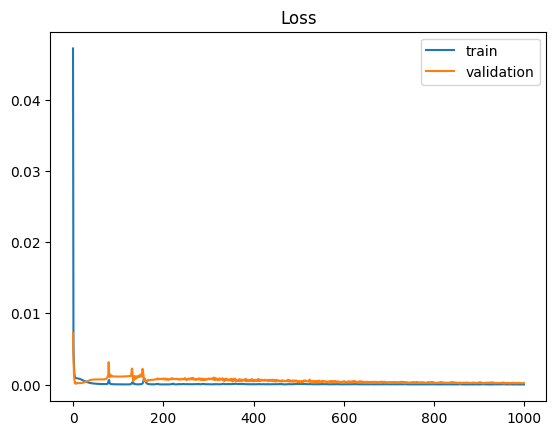

<Figure size 800x800 with 0 Axes>

loss:  7.563742656202521e-06    val_loss:  0.00021150428801774979


In [ ]:
trained_model = train_model(model, optimizer, loss_func, X_train, y_train, X_val, y_val, n_epochs=1000, batch_size=100, batch_shuffle=False)

In [ ]:
trained_model(X_val) *10

tensor([[ 0.1542],
        [ 0.0769],
        [ 0.0517],
        [ 0.0202],
        [ 0.0057],
        [ 0.0152],
        [ 0.3719],
        [ 0.0865],
        [-0.0191],
        [ 0.0506],
        [ 0.1131],
        [ 0.0423],
        [ 0.0164],
        [ 0.0285],
        [-0.0082],
        [ 0.0955],
        [ 0.0272],
        [ 0.0190],
        [ 0.0292],
        [ 0.0014],
        [ 0.1215],
        [ 0.1022],
        [ 0.0031],
        [ 0.0038],
        [ 0.0577],
        [ 0.2631],
        [-0.0910],
        [ 0.0356],
        [ 0.0803],
        [ 0.1001],
        [-0.0623],
        [ 0.1615],
        [ 0.0156],
        [-0.0033],
        [ 0.4950],
        [ 0.1608],
        [ 0.0691],
        [ 0.0219],
        [-0.0083],
        [ 0.1915],
        [ 0.0576],
        [ 0.0030],
        [ 0.2901],
        [ 0.0237],
        [-0.0133],
        [-0.0353],
        [ 0.3096],
        [ 0.0643],
        [ 0.0668],
        [ 0.1241]], device='cuda:0', grad_fn=<MulBackward0>)

In [ ]:
y_val *10

tensor([[9.1604e-04],
        [4.1027e-04],
        [9.8861e-03],
        [1.6867e-05],
        [9.9675e-03],
        [2.8619e-01],
        [7.3202e-04],
        [8.0523e-04],
        [3.8108e-01],
        [8.9406e-05],
        [1.1040e-03],
        [5.1314e-02],
        [1.4428e-01],
        [1.3446e-02],
        [1.8046e-03],
        [5.3728e-03],
        [2.6879e-03],
        [3.9540e-04],
        [1.2513e-03],
        [7.9972e-03],
        [4.3704e-02],
        [1.1836e-02],
        [1.7751e-03],
        [6.0520e-03],
        [2.0192e-04],
        [5.4474e-03],
        [7.8099e-03],
        [2.4399e-03],
        [3.2845e-03],
        [8.2882e-03],
        [6.7892e-05],
        [4.2233e-02],
        [1.0151e-03],
        [4.1202e-04],
        [2.5091e-02],
        [1.1523e-03],
        [2.8300e-03],
        [7.8783e-03],
        [5.0492e-03],
        [4.7229e-05],
        [9.2796e-04],
        [1.5403e-03],
        [2.3181e-02],
        [1.9082e-04],
        [1.6424e-03],
        [7